In [ ]:
# Instalar paquete anastruct
!pip install git+https://!pip install gitgithub.com/EnriqueGarMac/Estructuras_I_II.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://!pip install gitgithub.com/EnriqueGarMac/Estructuras_I_II.git to /tmp/pip-req-build-705c8t9k
  Running command git clone -q https://!pip install gitgithub.com/EnriqueGarMac/Estructuras_I_II.git /tmp/pip-req-build-705c8t9k
  Created wheel for anastruct: filename=anastruct-0.0.0-py3-none-any.whl size=59277 sha256=c994a6506dbf63de9bd51308e38f6f23320ad3d6e15a12fadc2a45dba0df0d6d
  Stored in directory: /tmp/pip-ephem-wheel-cache-o1_lflps/wheels/62/09/5f/b1ec8c8aa8ef4d05b262a97371318e32faaac83888d452f390
Successfully built anastruct


In [ ]:

import numpy as np
from anastruct import SystemElements
import collections
collections.Iterable = collections.abc.Iterable

# Crear objeto para la estructura
ss = SystemElements()

h = 2.0 # Ancho celda
hv = 1.0 # Alto celda

Ar = 0.01 # Area
Ey = 210e+3 # Módulo de Young

# Añadimos cordones
ss.add_truss_element(location=[[h/2,hv], [h/2+h,hv]],EA=Ey*Ar)
ss.add_truss_element(location=[[h/2+h,hv], [h/2+2*h,hv]],EA=Ey*Ar)
ss.add_truss_element(location=[[h/2+2*h,hv], [h/2+3*h,hv]],EA=Ey*Ar)
ss.add_truss_element(location=[[h/2+3*h,hv], [h/2+4*h,hv]],EA=Ey*Ar)

ss.add_truss_element(location=[[0,0], [h,0]],EA=Ey*Ar)
ss.add_truss_element(location=[[h,0], [2*h,0]],EA=Ey*Ar)
ss.add_truss_element(location=[[2*h,0], [3*h,0]],EA=Ey*Ar)
ss.add_truss_element(location=[[3*h,0], [4*h,0]],EA=Ey*Ar)
ss.add_truss_element(location=[[4*h,0], [5*h,0]],EA=Ey*Ar)

# Añadimos diagonales
ss.add_truss_element(location=[[0,0], [h/2.0,hv]],EA=Ey*Ar)
ss.add_truss_element(location=[[h/2.0,hv], [h,0]],EA=Ey*Ar)
ss.add_truss_element(location=[[h,0], [h+h/2.0,hv]],EA=Ey*Ar)
ss.add_truss_element(location=[[h+h/2.0,hv], [2*h,0]],EA=Ey*Ar)
ss.add_truss_element(location=[[2*h,0], [2*h+h/2.0,hv]],EA=Ey*Ar)
ss.add_truss_element(location=[[2*h+h/2.0,hv], [3*h,0]],EA=Ey*Ar)
ss.add_truss_element(location=[[3*h,0], [3*h+h/2.0,hv]],EA=Ey*Ar)
ss.add_truss_element(location=[[3*h+h/2.0,hv], [4*h,0]],EA=Ey*Ar)
ss.add_truss_element(location=[[4*h,0], [4*h+h/2.0,hv]],EA=Ey*Ar)
ss.add_truss_element(location=[[4*h+h/2.0,hv], [5*h,0]],EA=Ey*Ar)

# Añadimos apoyo fijo al nudo 6
ss.add_support_hinged(node_id=6)
# Añadimos carrito al nodo 9
ss.add_support_roll(node_id=9, direction=2)


# Añadimos carga puntual al nodo 2
ss.point_load(7, Fy=-1.0)
ss.point_load(8, Fy=-1.0)
ss.point_load(10, Fy=-0.5)
ss.point_load(11, Fy=-0.5)


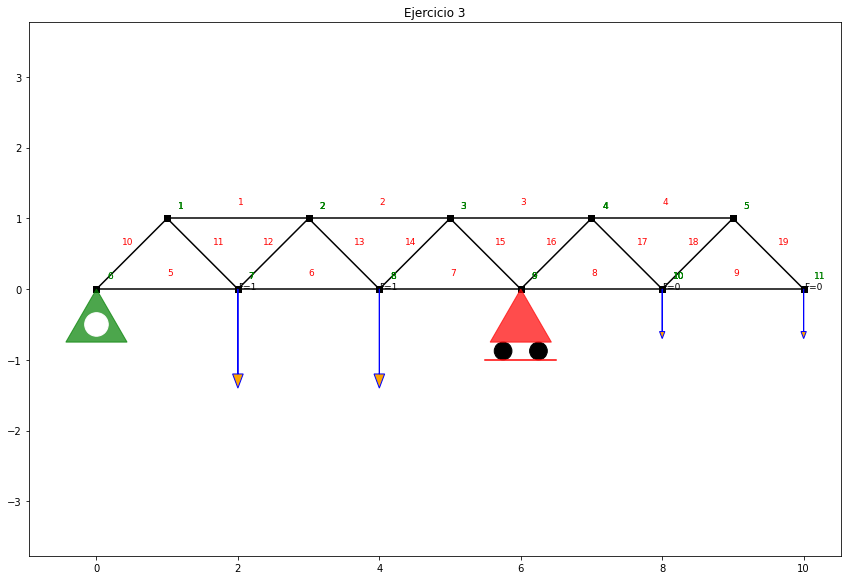

In [ ]:
# Mostramos estructura generada
ss.show_structure(title='Ejercicio 3')

In [ ]:
# Resolvemos la estructura
ss.solve();


 
 
Nudo -> Despl. x  Despl. y
**************************************************
1  ->  0.0017051810499221615   -0.0023786160680982858
2  ->  0.0007528000975412077   -0.0038842162631807027
3  ->  0.0007528000975412027   -0.0007913144807967057
4  ->  0.0036099429546840507   -0.005433003467226753
5  ->  0.0045623239070650004   -0.020387480145408886
6  ->  -0.0   0.0
7  ->  0.00047619047619047787   -0.004281041660006095
8  ->  0.0009523809523809582   -0.0030112003901648305
9  ->  -0.0004761904761904619   0.0
10  ->  -0.002380952380952361   -0.012770768839215409
11  ->  -0.0028571428571428376   -0.02848038192779285


Reacciones
***************************
*Nodo:  6
Reacción Fy:  0.5
*Nodo:  9
Reacción Fy:  2.5


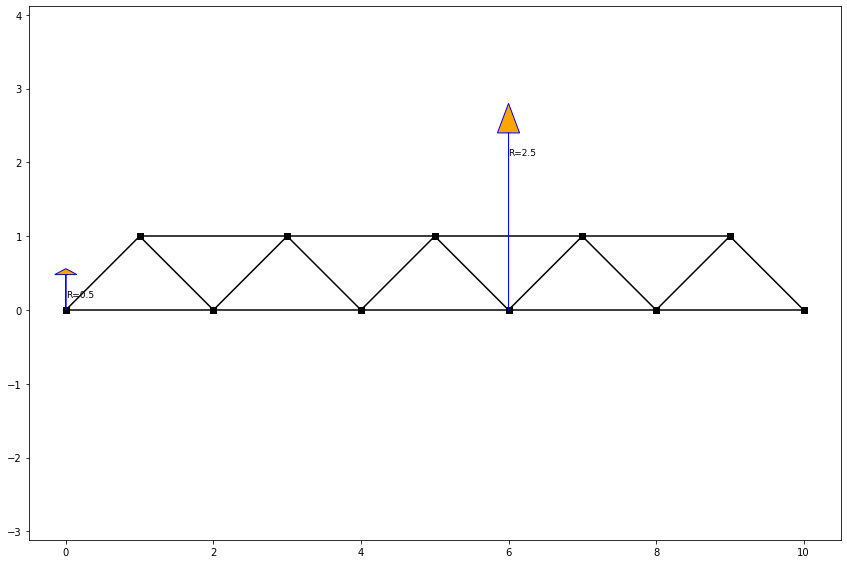

-------------------------------------------


In [ ]:
# Mostramos las reacciones
ss.show_reaction_force()

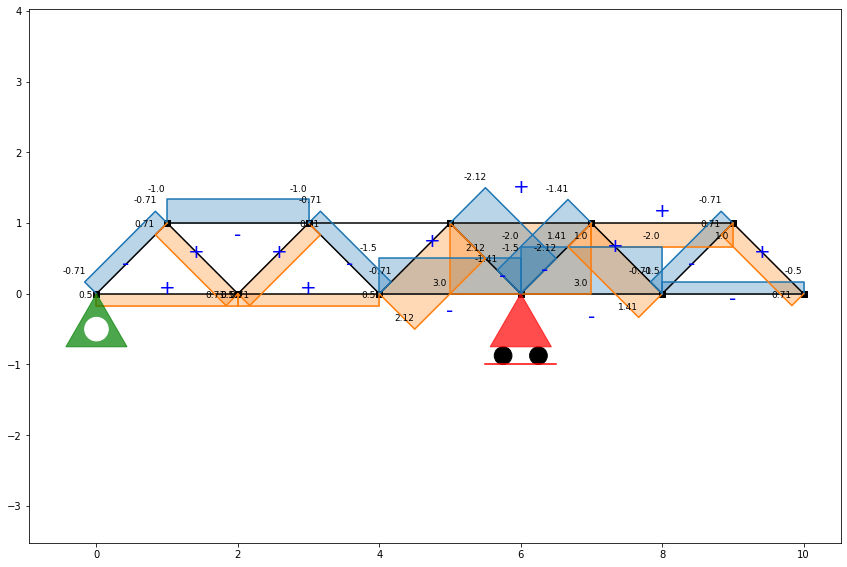

In [ ]:
# Mostramos axiles
ss.show_axial_force()



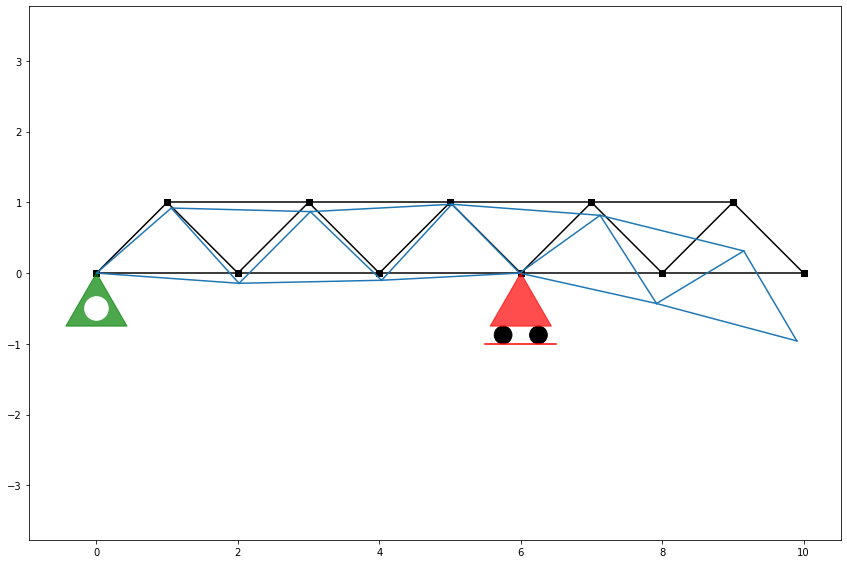

In [ ]:
# Mostramos deformada
ss.show_displacement()

Reacciones
***************************
*Nodo:  1
Reacción Fx:  -3.3760443329811096e-09
*Nodo:  1
Reacción Fy:  400000.00000000605
*Nodo:  9
Reacción Fx:  1.280568540096283e-09
*Nodo:  9
Reacción Fy:  400000.0000000089


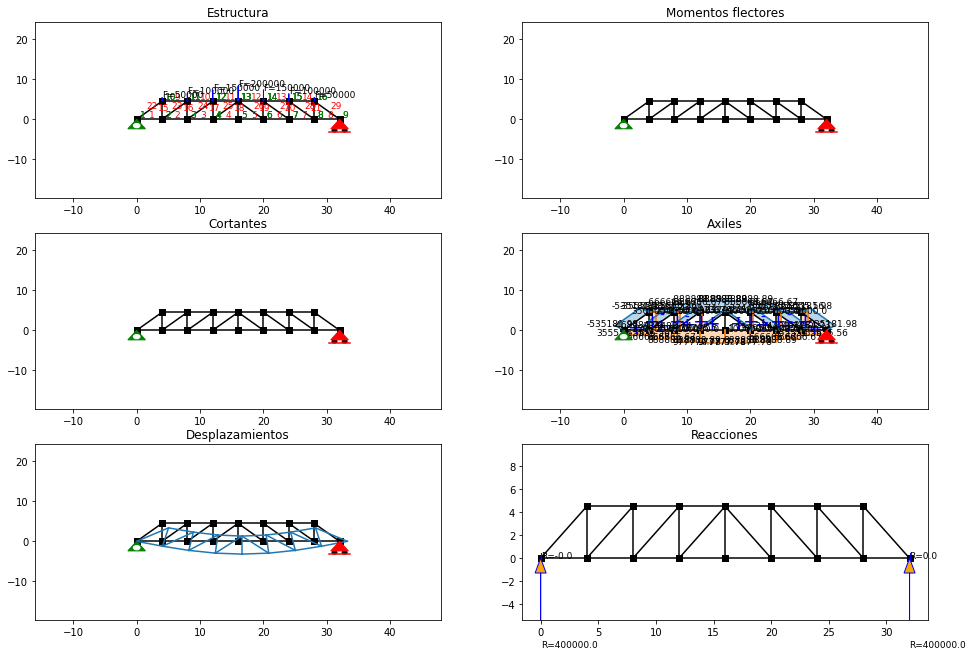

In [ ]:
# Mostramos todos los resultados juntos
ss.plotter.results_plot()